In [6]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib as plt
import nltk
import sklearn

In [7]:
data = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [11]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
data.rename(columns = {'v1': 'Label', 'v2': 'Text'}, inplace = True)

<AxesSubplot:ylabel='Label'>

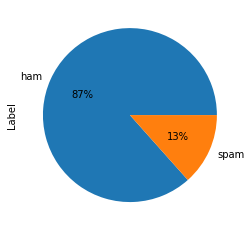

In [14]:
data['Label'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

In [16]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
pd.set_option('display.max_colwidth', -1)

In [18]:
data.shape

(5572, 2)

In [19]:
data.isna().sum()

Label    0
Text     0
dtype: int64

In [20]:
data.drop_duplicates(inplace = True)

In [21]:
data = data.sample(frac = 1, random_state = 7).reset_index(drop = True)

In [22]:
X = data['Text']
y = data['Label']

In [23]:
X = X.apply(lambda x: x.lower())

In [24]:
import string
X = X.str.replace('[{}]'.format(string.punctuation), '')


In [27]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [28]:
X = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [29]:
X

0       xmas story peace xmas msg love xmas miracle jesus hav blessed month ahead amp wish u merry xmas
1       hi u decide wot 2 get 4 bday ill prob jus get voucher frm virgin sumfing                       
2       super dagood replacement murali                                                                
3       reach office around ltdecimalgt amp mobile problem cannt get voice call asa ill free           
4       babe lost try rebooting                                                                        
                 ...                                                                                   
5164    de asking like                                                                                 
5165    de looking good                                                                                
5166    know need get hotel got invitation apologise cali sweet come english blokes weddin             
5167    also cbe pay                                            

In [30]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lmtz = WordNetLemmatizer()
X = X.apply(lambda x: ' '.join([lmtz.lemmatize(token, pos = 'v') for token in x.split()]))
X = X.apply(lambda x: ' '.join([lmtz.lemmatize(token, pos = 'n') for token in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [33]:
from nltk.stem import SnowballStemmer

ss = SnowballStemmer('english')
X = X.apply(lambda x: ' '.join([ss.stem(token) for token in x.split()]))

In [34]:
X

0       xmas stori peac xmas msg love xmas miracl jesus hav bless month ahead amp wish u merri xmas
1       hi u decid wot 2 get 4 bday ill prob jus get voucher frm virgin sumf                       
2       super dagood replac murali                                                                 
3       reach offic around ltdecimalgt amp mobil problem cannt get voic call asa ill free          
4       babe lose tri reboot                                                                       
                ...                                                                                
5164    de ask like                                                                                
5165    de look good                                                                               
5166    know need get hotel get invit apologis cali sweet come english bloke weddin                
5167    also cbe pay                                                                               


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words = 'english', max_features = 500)

One_hot_X = vec.fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(One_hot_X, y, test_size = 0.2)

In [37]:
from sklearn.naive_bayes import GaussianNB

classifier_G = GaussianNB()
classifier_G.fit(X_train.toarray(), y_train)

GaussianNB()

In [39]:
y_pred = classifier_G.predict(X_test.toarray())

In [43]:
from sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

accuracy score: 0.7098646034816247


In [48]:
from sklearn.naive_bayes import MultinomialNB

classifier_M = MultinomialNB()
classifier_M.fit(X_train.toarray(), y_train)

MultinomialNB()

In [49]:
y_pred_M = classifier_M.predict(X_test.toarray())

In [51]:
from sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred_M)))

accuracy score: 0.9777562862669246
